Concatenating all of teh CSV Files together to have an easier time handling all the data at once

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# File paths for the CSV files
resale_1990_1999 = './resale-flat-price-CSVs/resale-flat-prices-based-on-approval-date-1990-1999.csv'
resale_2000_2012 = './resale-flat-price-CSVs/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv'
resale_mar2012_dec2014 = './resale-flat-price-CSVs/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv'
resale_jan2015_dec2016 = './resale-flat-price-CSVs/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv'
resale_2017_onwards = './resale-flat-price-CSVs/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv'
median_rent = './median-rent-by-town-and-flat-type/median-rent-by-town-and-flat-type.csv'

# Load the datasets from CSV files
data1 = np.genfromtxt(resale_1990_1999, encoding=None, dtype=None, delimiter=',', names=True, usecols=("month", "town", "flat_type", "lease_commence_date", "resale_price"))
data2 = np.genfromtxt(resale_2000_2012, encoding=None, dtype=None, delimiter=',', names=True, usecols=("month", "town", "flat_type", "lease_commence_date", "resale_price"))
data3 = np.genfromtxt(resale_mar2012_dec2014, encoding=None, dtype=None, delimiter=',', names=True, usecols=("month", "town", "flat_type", "lease_commence_date", "resale_price"))
data4 = np.genfromtxt(resale_jan2015_dec2016, encoding=None, dtype=None, delimiter=',', names=True, usecols=("month", "town", "flat_type", "lease_commence_date", "resale_price"))
data5 = np.genfromtxt(resale_2017_onwards, encoding=None, dtype=None, delimiter=',', names=True, usecols=("month", "town", "flat_type", "lease_commence_date", "resale_price"))
data6 = np.genfromtxt(median_rent, encoding=None, dtype=None, delimiter=',', names=True, usecols=("quarter", "town", "flat_type", "median_rent"))

# Combine the datasets into one array
concatenated_data = np.concatenate((data1, data2, data3, data4, data5))

# Save the combined array to a new CSV file 
#Just used for checking
#np.savetxt('combined_data.csv', concatenated_data, delimiter=',', fmt='%s')


Produce a pie chart to display the popularity amongst different flat types

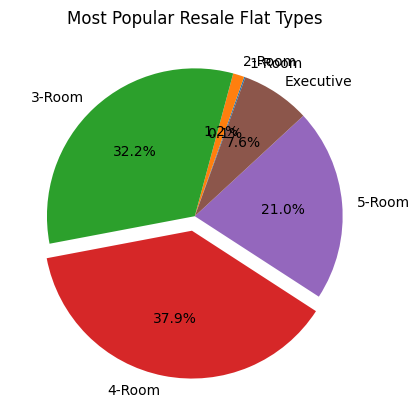

In [96]:
keyword1 = '1 ROOM'
keyword2 = '2 ROOM'
keyword3 = '3 ROOM'
keyword4 = '4 ROOM'
keyword5 = '5 ROOM'
keyword6 = 'EXECUTIVE'     

#data1
data1_1flat = data1[data1['flat_type'] == keyword1]
data1_2flat = data1[data1['flat_type'] == keyword2]
data1_3flat = data1[data1['flat_type'] == keyword3]
data1_4flat = data1[data1['flat_type'] == keyword4]
data1_5flat = data1[data1['flat_type'] == keyword5]
data1_Exec = data1[data1['flat_type'] == keyword6]  

#data2
data2_1flat = data2[data2['flat_type'] == keyword1]
data2_2flat = data2[data2['flat_type'] == keyword2]
data2_3flat = data2[data2['flat_type'] == keyword3]
data2_4flat = data2[data2['flat_type'] == keyword4]
data2_5flat = data2[data2['flat_type'] == keyword5]
data2_Exec = data2[data2['flat_type'] == keyword6]

#data3
data3_1flat = data3[data3['flat_type'] == keyword1]
data3_2flat = data3[data3['flat_type'] == keyword2]
data3_3flat = data3[data3['flat_type'] == keyword3]
data3_4flat = data3[data3['flat_type'] == keyword4]
data3_5flat = data3[data3['flat_type'] == keyword5]
data3_Exec = data3[data3['flat_type'] == keyword6] 

#data4
data4_1flat = data4[data4['flat_type'] == keyword1]
data4_2flat = data4[data4['flat_type'] == keyword2]
data4_3flat = data4[data4['flat_type'] == keyword3]
data4_4flat = data4[data4['flat_type'] == keyword4]
data4_5flat = data4[data4['flat_type'] == keyword5]
data4_Exec = data4[data4['flat_type'] == keyword6] 

#data5
data5_1flat = data5[data5['flat_type'] == keyword1]
data5_2flat = data5[data5['flat_type'] == keyword2]
data5_3flat = data5[data5['flat_type'] == keyword3]
data5_4flat = data5[data5['flat_type'] == keyword4]
data5_5flat = data5[data5['flat_type'] == keyword5]
data5_Exec = data5[data5['flat_type'] == keyword6] 

 
total_1_room_flat_resale_flats = len(data1_1flat) + len(data2_1flat) + len(data3_1flat) + len(data4_1flat) + len(data5_1flat)
total_2_room_flat_resale_flats = len(data1_2flat) + len(data2_2flat) + len(data3_2flat) + len(data4_2flat) + len(data5_2flat)
total_3_room_flat_resale_flats = len(data1_3flat) + len(data2_3flat) + len(data3_3flat) + len(data4_3flat) + len(data5_3flat)
total_4_room_flat_resale_flats = len(data1_4flat) + len(data2_4flat) + len(data3_4flat) + len(data4_4flat) + len(data5_4flat)
total_5_room_flat_resale_flats = len(data1_5flat) + len(data2_5flat) + len(data3_5flat) + len(data4_5flat) + len(data5_5flat)
total_exec_flat_resale_flats = len(data1_Exec) + len(data2_Exec) + len(data3_Exec) + len(data4_Exec) + len(data5_Exec)


flat_types = ['1-Room', '2-Room','3-Room','4-Room','5-Room','Executive']
resale_counts = [total_1_room_flat_resale_flats,total_2_room_flat_resale_flats,total_3_room_flat_resale_flats,total_4_room_flat_resale_flats,total_5_room_flat_resale_flats,total_exec_flat_resale_flats]
explode = [0,0,0,0.1,0,0]

plt.pie(resale_counts, labels=flat_types, autopct='%1.1f%%', startangle=70, explode=explode)
plt.title('Most Popular Resale Flat Types')
plt.show()

Drop any duplicates in the concatenated dataset to prevent complication

Problem: In the median_rent dataset there were towns that were duplicated because some ended with Spaces while some had no spaces, some 'KALLANG/WHAMPOA' were labelled as 'KALLANG/ WHAMPOA'
Solution: Loop through ['town'] and do .strip() to remove any whitespaces. Use the if condition to check if 'KALLANG' is in the current ['town'] iteration, then replace it with 'KALLANG/WHAMPOA'

In [ ]:
def sanitization_function():

    for i in range(len(concatenated_data)):
        concatenated_data[i]['town'] = concatenated_data[i]['town'].strip()

    for i in range(len(data6)):
        data6[i]['town'] = data6[i]['town'].strip()
        
        if 'KALLANG' in data6[i]['town']:
            data6[i]['town'] = 'KALLANG/WHAMPOA'

        if not data6[i]['median_rent'].isnumeric():
            data6[i]['median_rent'] = 'NA'

sanitization_function()



""" for i in range(len(data6)):
    print(type(data6[i]))
    if data6[i]['flat_type'] == '1-RM' and data6[i]['median_rent'] != 'NA':
        data6[i]['flat_type'] = '1 ROOM'
    elif data6[i]['flat_type'] == '2-RM' and data6[i]['median_rent'] != 'NA':
        data6[i]['flat_type'] = '2 ROOM'
    elif data6[i]['flat_type'] == '3-RM' and data6[i]['median_rent'] != 'NA':
        data6[i]['flat_type'] = '3 ROOM'
    elif data6[i]['flat_type'] == '4-RM' and data6[i]['median_rent'] != 'NA':
        data6[i]['flat_type'] = '4 ROOM'
    elif data6[i]['flat_type'] == '5-RM' and data6[i]['median_rent'] != 'NA':
        data6[i]['flat_type'] = '5 ROOM'
    elif data6[i]['flat_type'] == 'EXEC' and data6[i]['median_rent'] != 'NA':
        data6[i]['flat_type'] = 'EXECUTIVE'
        
data6_1flat = data6[data6['flat_type'] == keyword1]
data6_2flat = data6[data6['flat_type'] == keyword2]
data6_3flat = data6[data6['flat_type'] == keyword3]
data6_4flat = data6[data6['flat_type'] == keyword4]
data6_5flat = data6[data6['flat_type'] == keyword5]
data6_Exec = data6[data6['flat_type'] == keyword6] 

total_1_room_flat_rental_flats = len(data6_1flat) 
total_2_room_flat_rental_flats = len(data6_2flat) 
total_3_room_flat_rental_flats = len(data6_3flat)
total_4_room_flat_rental_flats = len(data6_4flat)
total_5_room_flat_rental_flats = len(data6_5flat)
total_exec_flat_rental_flats = len(data6_Exec)

rental_counts = [total_1_room_flat_rental_flats,total_2_room_flat_rental_flats,total_3_room_flat_rental_flats,total_4_room_flat_rental_flats,total_5_room_flat_rental_flats,total_exec_flat_rental_flats]

print(rental_counts) """


#Checks to see if the number of towns in the median_rent dataset corelates to the concatenated dataset
''' unique_towns = np.unique(concatenated_data['town'])
unique_towns2 = np.unique(data6['town'])
print(len(unique_towns))
print(len(unique_towns2)) '''


        
    
    
